In [1]:
import pandas as pd

In [2]:
df_housing = pd.read_csv(filepath_or_buffer="../data/housing.csv", sep=",")
df_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
import seaborn as sns

<Axes: xlabel='latitude', ylabel='longitude'>

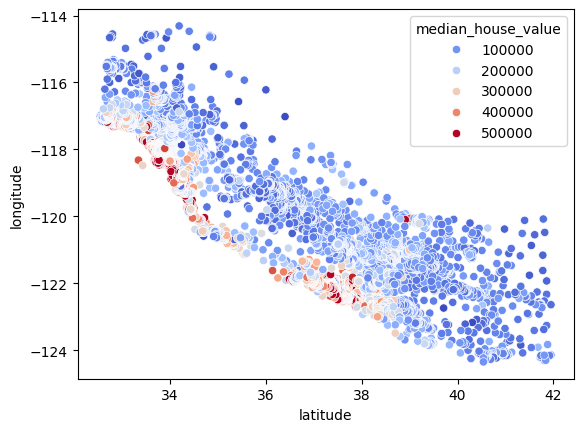

In [4]:
sns.scatterplot(data=df_housing, x="latitude", y="longitude", hue="median_house_value", palette="coolwarm")

In [13]:
filter = df_housing[df_housing["median_income"] > 10]
filter

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
131,-122.19,37.84,18.0,1617.0,210.0,533.0,194.0,11.6017,392600.0,NEAR BAY
409,-122.28,37.90,52.0,2003.0,250.0,658.0,244.0,10.0825,397000.0,NEAR BAY
510,-122.22,37.82,39.0,2492.0,310.0,808.0,315.0,11.8603,500001.0,NEAR BAY
511,-122.22,37.82,42.0,2991.0,335.0,1018.0,335.0,13.4990,500001.0,NEAR BAY
512,-122.23,37.82,52.0,3242.0,366.0,1001.0,352.0,12.2138,500001.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20376,-118.86,34.16,16.0,1509.0,216.0,578.0,235.0,10.2614,410800.0,<1H OCEAN
20380,-118.83,34.14,16.0,1316.0,194.0,450.0,173.0,10.1597,500001.0,NEAR OCEAN
20389,-118.90,34.19,26.0,1582.0,196.0,573.0,182.0,10.0595,500001.0,<1H OCEAN
20426,-118.69,34.18,11.0,1177.0,138.0,415.0,119.0,10.0472,500001.0,<1H OCEAN


<Axes: xlabel='latitude', ylabel='longitude'>

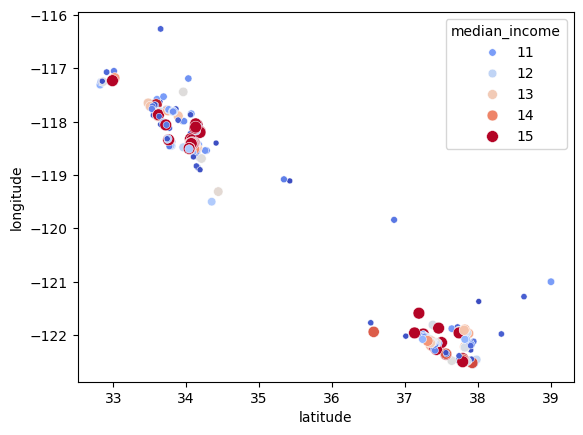

In [15]:
sns.scatterplot(data=filter, x="latitude", y="longitude", hue="median_income", palette="coolwarm", size=filter["median_income"])

In [16]:
# There is not y variables with this algorithm that is why only X is filled out

X = df_housing.loc[:, ["latitude", "longitude", "median_income"]]
X.head()

,latitude,longitude,median_income
0,37.88,-122.23,8.3252
1,37.86,-122.22,8.3014
2,37.85,-122.24,7.2574
3,37.85,-122.25,5.6431
4,37.85,-122.25,3.8462


In [17]:
from sklearn.cluster import KMeans

In [18]:
model = KMeans(n_clusters=3)
prediction = model.fit_predict(X)

In [19]:
prediction.shape

(20640,)

In [20]:
X["economic_class"] = prediction
X.head()

,latitude,longitude,median_income,economic_class
0,37.88,-122.23,8.3252,2
1,37.86,-122.22,8.3014,2
2,37.85,-122.24,7.2574,2
3,37.85,-122.25,5.6431,2
4,37.85,-122.25,3.8462,2


In [21]:
X["economic_class"].value_counts()

economic_class
0    9763
2    8439
1    2438
Name: count, dtype: int64

<Axes: xlabel='latitude', ylabel='longitude'>

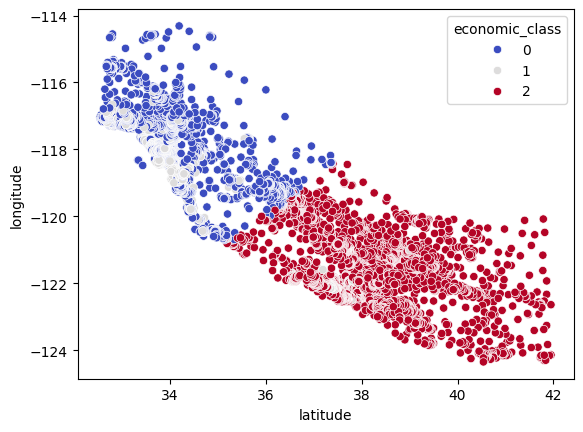

In [22]:
sns.scatterplot(data=X, x="latitude", y="longitude", hue="economic_class", palette="coolwarm")

In [24]:
model = KMeans(n_clusters=10)
prediction = model.fit_predict(X)
X["economic_class"] = prediction
X["economic_class"].value_counts()

economic_class
1    4513
4    4439
0    2910
9    2773
2    1955
3    1552
6    1245
7     786
8     297
5     170
Name: count, dtype: int64

<Axes: xlabel='latitude', ylabel='longitude'>

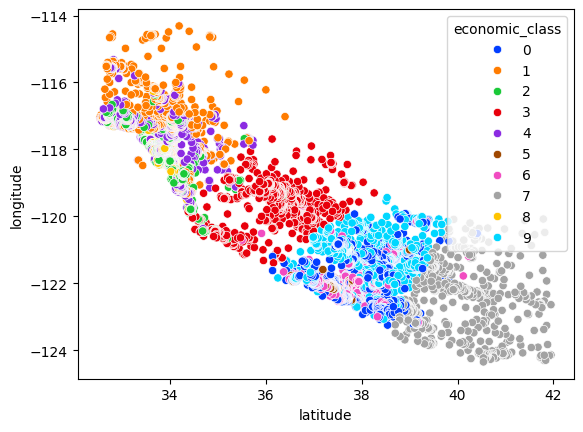

In [26]:
sns.scatterplot(data=X, x="latitude", y="longitude", hue="economic_class", palette="bright")

<Axes: xlabel='economic_class', ylabel='count'>

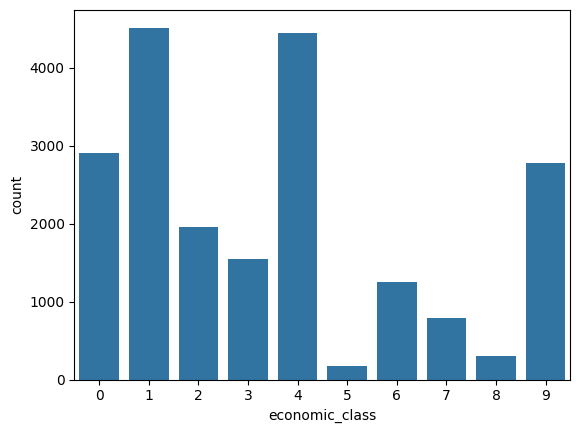

In [27]:
sns.countplot(x="economic_class", data=X)

In [28]:
X.groupby(["economic_class"])["median_income"].mean()

economic_class
0     4.214154
1     2.396609
2     6.354950
3     2.657518
4     4.154277
5    11.011980
6     6.426798
7     2.388739
8    10.910437
9     2.463392
Name: median_income, dtype: float64

In [29]:
model = KMeans(n_clusters=5)
prediction = model.fit_predict(X)
X["economic_class"] = prediction
X["economic_class"].value_counts()

economic_class
1    6713
2    5703
4    3559
0    2955
3    1710
Name: count, dtype: int64

<Axes: xlabel='latitude', ylabel='longitude'>

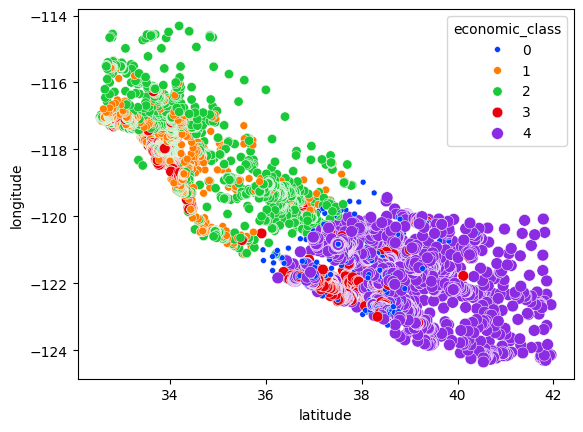

In [30]:
sns.scatterplot(data=X, x="latitude", y="longitude", hue="economic_class", palette="bright", size="economic_class")

<Axes: xlabel='economic_class', ylabel='count'>

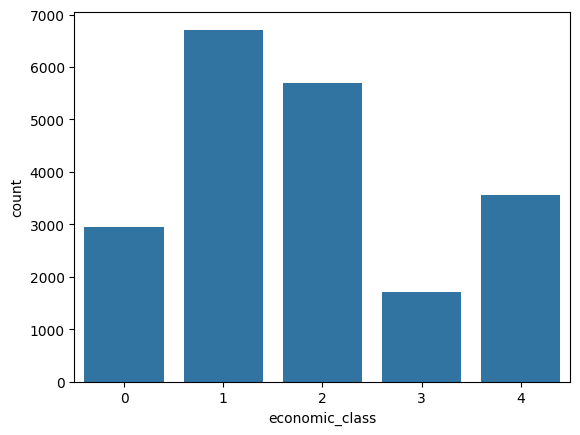

In [31]:
sns.countplot(x="economic_class", data=X)

In [32]:
X.groupby(["economic_class"])["median_income"].mean()

economic_class
0    4.198166
1    4.790290
2    2.371222
3    7.658620
4    2.446905
Name: median_income, dtype: float64